In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from matplotlib.animation import FuncAnimation

# Import scienceplots and set the style
import scienceplots
def set_style():
    sp.science_plot_defaults()  # Set the SciencePlots style



In [47]:
def visualize_data(Xpos, Zpos, title):
    """
    Visualize the data by plotting the Xpos and Zpos for each tracker.
    """
    set_style()  # Set the science style

    # Set the unified window size for the plot
    plt.figure(figsize=(12, 6))

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    for i in range(Xpos.shape[1]):
        axs[0].plot(Xpos[:, i], label=f'Tracker {i + 1}')
        axs[1].plot(Zpos[:, i], label=f'Tracker {i + 1}')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Distance')
    axs[0].legend()
    axs[0].set_title('Horizontal Move (x-axis)')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Distance')
    axs[1].legend(loc='lower left')
    axs[1].set_title('Vertical Move (z-axis)')
    plt.suptitle(title)
    plt.show()

In [48]:

def animate_trackers(Xpos, Ypos, Zpos, num_trackers):
    """
    Animation function to animate the positions of the trackers over time.
    """
    set_style()  # Set the science style
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')  # Create a 3D axes

    def update(frame):
        ax.cla()  # Clear the current plot

        for i in range(num_trackers):
            # Plot the Xpos, Ypos, and Zpos of each tracker at the current frame
            ax.plot([Xpos[frame, i]], [Ypos[frame, i]], [Zpos[frame, i]], 'o', markersize=8, label=f'Tracker {i + 1}')

        ax.set_xlabel('X Position')
        ax.set_ylabel('Y Position')
        ax.set_zlabel('Z Position')
        ax.set_title(f'3D Tracking Animation (Frame {frame + 1})')
        ax.legend(loc='upper right')

    ani = FuncAnimation(fig, update, frames=Xpos.shape[0], interval=100)
    plt.show()

In [49]:
def plot_displacement(data):
    """
    Plot the displacement of each tracker.
    """
    set_style()  # Set the science style
    trackers = data['tracker'].unique()
    displacements = []

    for tracker_num in trackers:
        displacement = compute_displacement(data, tracker_num)
        displacements.append(displacement)

    plt.figure(figsize=(8, 6))
    plt.bar(trackers, displacements)
    plt.xlabel("Tracker Number")
    plt.ylabel("Displacement")
    plt.title("Displacement of Trackers")
    plt.show()

In [50]:
def clean_data(Xpos, Zpos, valid_threshold):
    """
    Clean the data by removing trackers with insufficient valid data.
    """
    valid_trackers = [i for i in range(Xpos.shape[1]) if np.count_nonzero(~np.isnan(Xpos[:, i])) >= valid_threshold]
    Xpos = Xpos[:, valid_trackers]
    Zpos = Zpos[:, valid_trackers]
    return Xpos, Zpos

In [51]:
def plot_average_velocity(average_velocity):
    """
    Plot the average velocity of all trackers.
    """
    set_style()  # Set the science style
    plt.figure(figsize=(8, 6))
    plt.plot(average_velocity, label='Average Velocity')
    plt.xlabel('Time')
    plt.ylabel('Velocity')
    plt.legend()
    plt.title('Average Velocity of All Trackers')
    plt.show()

In [52]:
def calculate_velocity(Xpos, Zpos):
    """
    Calculate the velocity of each tracker on the X-Z plane.
    """
    num_frames = Xpos.shape[0]
    num_trackers = Xpos.shape[1]
    velocity = np.zeros((num_frames, num_trackers))

    for i in range(num_trackers):
        for j in range(1, num_frames):
            delta_x = Xpos[j, i] - Xpos[j - 1, i]
            delta_z = Zpos[j, i] - Zpos[j - 1, i]
            time_interval = 1  # Assuming each frame has a time interval of 1 (you can change this if needed)
            velocity[j, i] = np.sqrt(delta_x**2 + delta_z**2) / time_interval

    return velocity


/var/folders/wv/gyf44h3j2j7_0l6h0jpy65mm0000gn/T/ipykernel_45687/1475145083.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.strip().str.replace('[^a-zA-Z0-9]', '')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


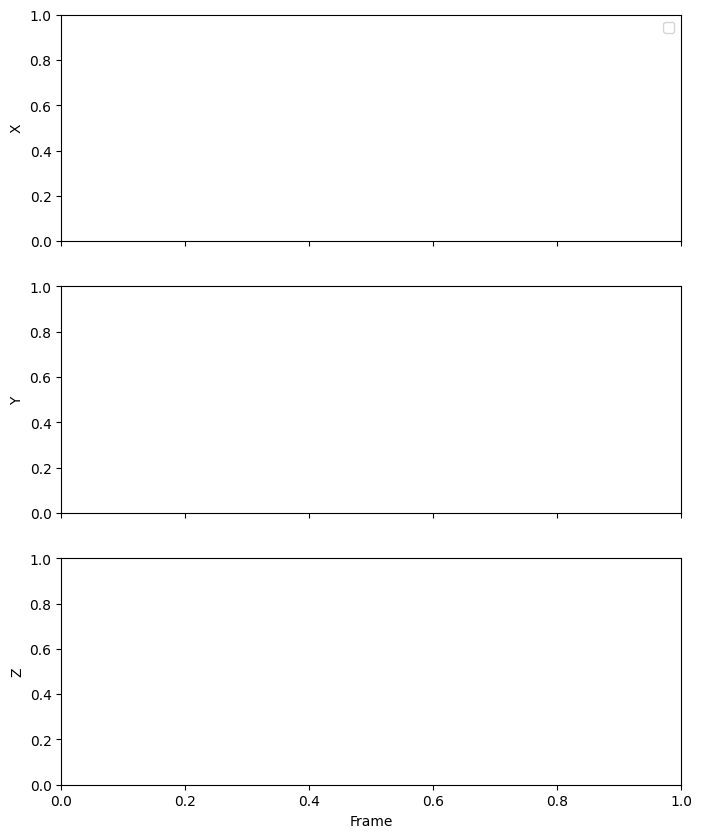

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

def read_csv_data(file_path):
    data = pd.read_csv(file_path, header=5, delimiter='\t')
    return data

def clean_data(data, num_valid_trackers):
    # Select only the necessary columns (X, Y, Z coordinates) and drop any NaN values
    data = data.iloc[:, 2:].dropna()

    # Clean column names by removing leading/trailing spaces and any special characters
    data.columns = data.columns.str.strip().str.replace('[^a-zA-Z0-9]', '')

    # Since we have multiple markers, we need to filter by the number of valid trackers
    valid_trackers = data.columns[:num_valid_trackers]
    data = data[valid_trackers]

    return data

def plot_coordinates(data):
    num_trackers = len(data.columns)

    fig, axs = plt.subplots(3, 1, figsize=(8, 10), sharex=True)

    for i, coord in enumerate(['X', 'Y', 'Z']):
        axs[i].set_ylabel(coord)
        for j in range(num_trackers):
            axs[i].plot(data.index, data[data.columns[j]][coord], label=f"Tracker {j+1}")

    axs[2].set_xlabel("Frame")
    axs[0].legend(loc='upper right')
    plt.show()

if __name__ == "__main__":
    file_path = '/Users/jamesxu/Desktop/Crab Lab/traking data CSV/CSV_0720_cent_flat_wave_Num/0720_cent_waveNum_0.6_trail_1.csv'
    num_valid_trackers = 6  # Change this to the number of valid trackers in your data

    data = read_csv_data(file_path)
    cleaned_data = clean_data(data, num_valid_trackers)
    plot_coordinates(cleaned_data)


In [54]:
if __name__ == "__main__":
    main()

AttributeError: module 'scienceplots' has no attribute 'science_plot_defaults'